In [ ]:
!pip install geopandas

In [ ]:
!pip install geoplot

In [41]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import geoplot

In [7]:
link="https://raw.githubusercontent.com/davidmorme/Universidad/main/OS16/data/temp_et_coord_14villes.csv"
df=pd.read_csv(link, sep=";")

In [8]:
lista=[]
for i in range(len(df.columns)):
    lista.append(df.columns[i].replace("'",""))
df.columns=lista
del lista

In [186]:
df1=df.iloc[12:,:].transpose()
df1.columns=["Longitude","Latitude"]
gdf = geopandas.GeoDataFrame(df1, geometry=geopandas.points_from_xy(df1.Longitude, df1.Latitude))
df1

,Longitude,Latitude,geometry
Bordeaux,-0.34,44.5,POINT (-0.34000 44.50000)
Brest,-4.29,48.2,POINT (-4.29000 48.20000)
Clermont-Ferrand,3.05,45.5,POINT (3.05000 45.50000)
Grenoble,5.43,45.1,POINT (5.43000 45.10000)
Lille,3.04,50.4,POINT (3.04000 50.40000)
Lyon,4.51,45.5,POINT (4.51000 45.50000)
Marseille,5.24,43.2,POINT (5.24000 43.20000)
Montpellier,3.53,43.4,POINT (3.53000 43.40000)
Nantes,-1.33,47.1,POINT (-1.33000 47.10000)
Nice,7.15,43.4,POINT (7.15000 43.40000)


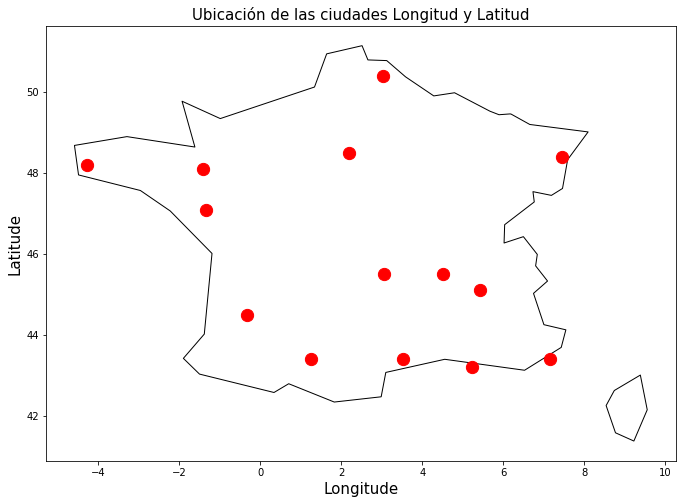

In [185]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
France=world[world.name == 'France']
France=France.explode(index_parts=True, ignore_index=True)
France=France.iloc[1:3]
ax=France.plot(color='white', edgecolor='black',figsize=(15, 8))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red', markersize=150)
plt.title("Ubicación de las ciudades Longitud y Latitud", fontsize=15)
ax.set_xlabel("Longitude", fontsize=15)
ax.set_ylabel("Latitude", fontsize=15)
plt.show()